# Exploring AI & ML Job Trends in the U.S.

## Notebook Version: v1  
**Focus**: Dataset loading and basic structural preview  

This notebook is part of a versioned project exploring trends in AI/ML job postings in the U.S.  
This version focuses on loading the dataset, checking its structure, and identifying surface-level issues.


In [57]:
#importing the necessary libraries
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ai-and-ml-job-listings-usa/ai_ml_jobs_linkedin.csv


## Dataset Overview

- Source: Kaggle – AI and ML Job Listings USA  
- File path: `/kaggle/input/ai-and-ml-job-listings-usa/ai_ml_jobs_linkedin.csv

## Load and Preview Data

Loading the dataset into a DataFrame and preview the structure to understand its basic layout.


In [58]:
# Load the dataset
us_jobs_df = pd.read_csv('/kaggle/input/ai-and-ml-job-listings-usa/ai_ml_jobs_linkedin.csv')

# Create a working copy
jobs_df = us_jobs_df.copy()

In [59]:
# Preview first 2 rows
jobs_df.head(2)


,title,location,publishedAt,companyName,description,applicationsCount,contractType,experienceLevel,workType,sector
0,AI/ML Engineer,"New York, NY",2024-05-29,Wesper,THE OPPORTUNITY\n\nWesper is looking for a sma...,Over 200 applicants,Full-time,Mid-Senior level,Engineering and Information Technology,Internet Publishing
1,Software Engineer - AI/ML Systems,"Redwood City, CA",NaN,Snorkel AI,We're on a mission to democratize AI by buildi...,51 applicants,Full-time,Entry level,Engineering and Information Technology,Software Development


In [60]:
# Check dataset shape
print(f"Rows: {jobs_df.shape[0]}, Columns: {jobs_df.shape[1]}")

# Data types and non-null info
jobs_df.info()

Rows: 862, Columns: 10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              862 non-null    object
 1   location           862 non-null    object
 2   publishedAt        850 non-null    object
 3   companyName        861 non-null    object
 4   description        862 non-null    object
 5   applicationsCount  862 non-null    object
 6   contractType       862 non-null    object
 7   experienceLevel    862 non-null    object
 8   workType           862 non-null    object
 9   sector             859 non-null    object
dtypes: object(10)
memory usage: 67.5+ KB


In [61]:
# Summary stats for numeric columns
jobs_df.describe()

,title,location,publishedAt,companyName,description,applicationsCount,contractType,experienceLevel,workType,sector
count,862,862,850,861,862,862,862,862,862,859
unique,450,164,142,519,748,145,5,7,55,156
top,Machine Learning Engineer,United States,2024-05-22,"Unreal Staffing, Inc",Grammarly is excited to offer a remote-first h...,Over 200 applicants,Full-time,Mid-Senior level,Engineering and Information Technology,Software Development
freq,146,140,136,45,17,371,744,403,557,197


## Initial Observations and Notes

- The dataset contains **862 rows** and **10 columns**.
- Some columns such as `companyName`, `publishedAt`, and `sector` contain missing values.
- Columns like `applicationsCount` and `publishedAt` may need data type conversions in the next version.
- No immediate data loading issues were encountered.


## Notebook Version: v2  
**Focus**: Data Cleaning and Formatting  
 
This version focuses on cleaning the dataset, handling missing values, renaming columns, correcting data types, and preparing the data for analysis.


In [62]:
#previewing the data again
jobs_df.head(3)

,title,location,publishedAt,companyName,description,applicationsCount,contractType,experienceLevel,workType,sector
0,AI/ML Engineer,"New York, NY",2024-05-29,Wesper,THE OPPORTUNITY\n\nWesper is looking for a sma...,Over 200 applicants,Full-time,Mid-Senior level,Engineering and Information Technology,Internet Publishing
1,Software Engineer - AI/ML Systems,"Redwood City, CA",NaN,Snorkel AI,We're on a mission to democratize AI by buildi...,51 applicants,Full-time,Entry level,Engineering and Information Technology,Software Development
2,ML Engineer at 100% Remote,"San Jose, CA",2024-06-01,ELITE MENTE LLC,"Hello ,\n\nHope you are doing well!\n\nPlease ...",Be among the first 25 applicants,Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting


## Handling missing/null values

In [63]:
#checking for null values if any
jobs_df.isna().sum()

title                 0
location              0
publishedAt          12
companyName           1
description           0
applicationsCount     0
contractType          0
experienceLevel       0
workType              0
sector                3
dtype: int64

## Data Type Fix

In [64]:
#handling null values

#filling the null values in columns 'companyName' and 'experienceLevel' as 'Unknown'
jobs_df[['companyName','sector']] = jobs_df[['companyName','sector']].fillna('Unknown')

#handling the null value for column 'publishedAt' using ffill() assuming that the post has been updated nearly at that date
jobs_df['publishedAt'] = jobs_df['publishedAt'].fillna(method='ffill')

#check if null value still exists
jobs_df.isna().sum()


/tmp/ipykernel_36/407558311.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  jobs_df['publishedAt'] = jobs_df['publishedAt'].fillna(method='ffill')


title                0
location             0
publishedAt          0
companyName          0
description          0
applicationsCount    0
contractType         0
experienceLevel      0
workType             0
sector               0
dtype: int64

#### NOTE:
Filled publishedAt using forward fill to maintain temporal continuity, assuming listings are updated close to previous records.

In [65]:
#checking for the datatypes 
jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              862 non-null    object
 1   location           862 non-null    object
 2   publishedAt        862 non-null    object
 3   companyName        862 non-null    object
 4   description        862 non-null    object
 5   applicationsCount  862 non-null    object
 6   contractType       862 non-null    object
 7   experienceLevel    862 non-null    object
 8   workType           862 non-null    object
 9   sector             862 non-null    object
dtypes: object(10)
memory usage: 67.5+ KB


In [66]:
# converting 'publishedAt' into datetime data type  
jobs_df['publishedAt'] = pd.to_datetime(jobs_df['publishedAt'])

# converting 'applicationsCount' into integer data type
#first we need to extract the count of the applications 
jobs_df['applicationsCount'] = jobs_df['applicationsCount'].str.extract(r'(\d+)')[0]

#now convert the 'applicationsCount' dtype to numeric
jobs_df['applicationsCount'] = pd.to_numeric(jobs_df['applicationsCount'])
jobs_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              862 non-null    object        
 1   location           862 non-null    object        
 2   publishedAt        862 non-null    datetime64[ns]
 3   companyName        862 non-null    object        
 4   description        862 non-null    object        
 5   applicationsCount  862 non-null    int64         
 6   contractType       862 non-null    object        
 7   experienceLevel    862 non-null    object        
 8   workType           862 non-null    object        
 9   sector             862 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 67.5+ KB


## Removing the columns that are not useful for my analysis

In [67]:
#making a new df to store only the columns that are useful for my analysis

updated_jobs = jobs_df.drop(columns=['description','sector','workType'])
updated_jobs

,title,location,publishedAt,companyName,applicationsCount,contractType,experienceLevel
0,AI/ML Engineer,"New York, NY",2024-05-29,Wesper,200,Full-time,Mid-Senior level
1,Software Engineer - AI/ML Systems,"Redwood City, CA",2024-05-29,Snorkel AI,51,Full-time,Entry level
2,ML Engineer at 100% Remote,"San Jose, CA",2024-06-01,ELITE MENTE LLC,25,Full-time,Entry level
3,Machine Learning Engineer (L4) - Infrastructur...,"Los Gatos, CA",2024-05-19,Netflix,200,Full-time,Not Applicable
4,Data Scientist / ML Engineer,"Redwood City, CA",2024-05-19,"Paradyme, Inc.",110,Full-time,Entry level
...,...,...,...,...,...,...,...
857,Machine Learning (Pre-Sales) Solutions Engineer,"Redwood City, CA",2024-05-22,Snorkel AI,200,Full-time,Entry level
858,Machine Learning Engineer,"Springfield, VA",2023-09-25,INflow Federal,25,Full-time,Not Applicable
859,Machine Learning Engineer,"Los Angeles, CA",2024-05-22,Centerfield,200,Full-time,Mid-Senior level
860,Principal ML Engineer (Data IKU),"New York, NY",2024-04-11,Tiger Analytics,25,Full-time,Director


## Duplicate Check and Removal

In [68]:
# checking the duplicate values that exists (based on all columns)
# updated_jobs.duplicated().sum()
updated_jobs[updated_jobs.duplicated()]

# dropping the duplicated values
updated_jobs.drop_duplicates(inplace=True)

# check if any row exist that have same title,companyName, location and publishedAt
updated_jobs.duplicated(subset=['title', 'companyName', 'location', 'publishedAt']).sum()

# removing the dupliacted values
duplicate_vals = updated_jobs.duplicated(subset=['title', 'companyName', 'location', 'publishedAt'])
updated_jobs = updated_jobs[~duplicate_vals].copy()

#resetting the index after droppingt the duplicate values
updated_jobs.reset_index(drop=True,inplace=True)

## Whitespace Stripping 



In [69]:
#stripping the whitespaces if any, from the string based columns

for col in ['title','companyName','location','experienceLevel','contractType']:
    updated_jobs[col] = updated_jobs[col].str.strip()



## Category Cleaning

In [70]:
#1. title
# for consistency I am converting the titles into title case
updated_jobs['title'] = updated_jobs['title'].str.title()

#check if the function is applied properly
updated_jobs['title'].head(3)

#2. location
# I will be splitting the location column into two parts: one is for city and other is for state
location_split = updated_jobs['location'].str.split(',',n=1,expand=True)

#adding the city column
updated_jobs['city'] = location_split[0].str.strip()

#adding the state column
updated_jobs['state'] = location_split[1].str.strip()

#check if any null value has been added due to the above two columns
updated_jobs.isna().sum()

#handle the null values
updated_jobs['state'] = updated_jobs['state'].fillna('Unknown')

#rechecking for null values
updated_jobs.isna().sum()

#removing the location column as it is no more useful
updated_jobs.drop('location',axis='columns',inplace=True)

#3. publishedAt
# I will be asplitting this column also into two parts year and month (day is not useful)

updated_jobs['year'] = updated_jobs['publishedAt'].dt.year
updated_jobs['month'] = updated_jobs['publishedAt'].dt.month

#dropping the publishedAt column because it is not useful
updated_jobs.drop('publishedAt',axis='columns',inplace=True)
updated_jobs.columns

#4. companyName
# converting the company's name into title case so that it remains consistent throughout
updated_jobs['companyName'] = updated_jobs['companyName'].str.title()

#check if the change has been made properly
updated_jobs['companyName'].head(5)

0             Wesper
1         Snorkel Ai
2    Elite Mente Llc
3            Netflix
4     Paradyme, Inc.
Name: companyName, dtype: object

## Dataset Cleaning and Structuring Summary

In this version, I focused on cleaning and structuring the dataset to prepare it for meaningful analysis. The original dataset had multiple inconsistencies and mixed-format fields which could hinder exploration and insights.

## 🚀 Key actions
- Selected 7 relevant columns for the analysis.
- Cleaned categorical columns (`title`, `companyName`, `location`) for consistency.
- Split complex fields like `location` and `publishedAt` into simpler, analyzable components (city, state, year, month).
- Handled missing values in `state` by filling with "Unknown".

## ⚠️ Challenges
- Some job titles were overly specific or inconsistent (e.g., different casing, role modifiers). I resolved this with title casing but might need more grouping later.
- The `location` field didn’t follow a uniform format in all rows — some were missing state info, which led to NaN values after splitting.
- The `publishedAt` field contained full timestamps, which were not useful at this stage. It took care to isolate only the useful components (year/month) without losing meaning.

## 🎯 Learnings
- Even basic string cleaning and formatting (like `.str.title()` or `.str.strip()`) can greatly improve consistency in the dataset.
- Breaking down complex columns (like `location` and `publishedAt`) can make future analysis smoother and more insightful.
- It's important to analyze columns one by one instead of applying generic cleaning — each column may need unique handling.



## Notebook Version: v3  
**Focus**: Exploratory Data Analysis (EDA)

This version focuses on asking structured and slightly deeper questions to understand the dataset better.  
I'm primarily focusing on categorical patterns, hiring distributions, and application behavior.  
We'll go from basic univariate counts to intermediate bivariate groupings (without visuals, which are reserved for v4).

> Note: `title` and `sector` are *not* taken up in this version intentionally.  
> - `title` is too noisy to analyze meaningfully without cleanup — we’ll handle that in **v5**.  
> - `sector` is reserved for **v5** as well, to avoid overloading this version and to keep v3 beginner-friendly.



### 1. Exploring Unique Values in Categorical Columns

In [71]:
#finding number of unique values in categorical columns
print('Unique values in categorical column:')
print(updated_jobs[['contractType','experienceLevel','month','year']].nunique())

Unique values in categorical column:
contractType        5
experienceLevel     7
month              12
year                3
dtype: int64


### 2. Top 10 Most Common Job Titles

In [72]:
#top 10 most common job titles
common_title = updated_jobs['title'].value_counts().head(10)
print('Top 10 most common job titles')
print(common_title)

Top 10 most common job titles
title
Machine Learning Engineer                    142
Ai/Ml Engineer                                26
Senior Machine Learning Engineer              25
Ml Engineer                                   22
Machine Learning Engineer, Growth             17
Ai Engineer                                   14
Full-Stack Engineer (With Ml/Ai Exposure)     12
Full-Stack Engineer With Ml/Ai Experience     12
Senior Ml Engineer                            11
Artificial Intelligence Engineer              11
Name: count, dtype: int64


This gives a sense of which roles are being advertised the most — though detailed title analysis will be taken in v5.


###  3. Companies Posting the Most Jobs

In [73]:
#companies that have posted the most job listings
print('Companies that have posted the most job listings')
print(updated_jobs['companyName'].value_counts().head(10))

Companies that have posted the most job listings
companyName
Unreal Staffing, Inc           35
Doordash                       25
Grammarly                      18
Steneral Consulting            17
Diverse Lynx                   11
Samsung Electronics America    10
Stripe                         10
Triunity Software, Inc.         8
Netflix                         7
Figma                           7
Name: count, dtype: int64


Companies with the most job listings often reflect dominant hiring brands in the market.


###  4. Top 5 Hiring Cities (with Cleaning)

In [74]:
#cities that are hiring the most(top 5)

#NOTE: alot of records have United States as a city but that is a wrong value, thus replacing it with 'Unknown'
updated_jobs['city'] = updated_jobs['city'].replace('United States','Unknown')
updated_jobs['city'].value_counts()

#NOTE: majority of companies have not entered the city, thus we will be ignoring it and will show the actual city names
hiring_cities = updated_jobs['city'][updated_jobs['city'] != 'Unknown']
hiring_cities.reset_index(drop=True, inplace=True)
print('Top 5 cities in US that are hiring the most')
print(hiring_cities.value_counts().head())

Top 5 cities in US that are hiring the most
city
San Francisco    86
New York         82
Seattle          30
Mountain View    23
Irving           21
Name: count, dtype: int64


I noticed that many job listings have 'United States' or missing city data, so I cleaned it for more realistic counts.
(Probably missed in v2 while cleaning the data)

###  5. Most Common Contract Type & Experience Level

In [75]:
#most common contractType
print('Most common contract type: ')
print(updated_jobs['contractType'].value_counts().head(1).index[0])
print()

#experience level that is highest in demand
print('Experience level that is highest in demand ')
print(updated_jobs['experienceLevel'].value_counts())

Most common contract type: 
Full-time

Experience level that is highest in demand 
experienceLevel
Mid-Senior level    394
Entry level         326
Not Applicable       72
Associate            33
Internship            9
Director              6
Executive             1
Name: count, dtype: int64


Basic univariate checks to understand the dominant job types and demanded experience levels.


###  6. Average Application Count

In [76]:
#average of application counts
print('Average of application counts:')
print(updated_jobs['applicationsCount'].mean())

Average of application counts:
127.84661117717003


This shows how saturated the job market is — a very high mean might suggest few postings with extreme competition.


### 7. Company with Highest/Lowest Application Count

In [77]:
#company that recieved highest and lowest number of applications

#grouping the company with the total number of application count
job_app_count = updated_jobs.groupby('companyName').agg({'applicationsCount':'sum'})

#extracting the max and min count
max_val = job_app_count['applicationsCount'].max()
min_val = job_app_count['applicationsCount'].min()

#extracting the company names
print("Company that recieved highest applications")
highest_company = job_app_count[job_app_count['applicationsCount'] == max_val]
print(highest_company)
print()

lowest_company = job_app_count[job_app_count['applicationsCount'] == min_val]
print("Top 5 companies that got lowest application count")
print(lowest_company.head())
print()
#NOTE! : there are alot of companies that have got the minimum(25) number of applications, so showing only 5 of them

Company that recieved highest applications
             applicationsCount
companyName                   
Doordash                  5000

Top 5 companies that got lowest application count
                             applicationsCount
companyName                                   
1872 Consulting                             25
47Billion                                   25
Acentra Health                              25
Adlib Recruitment | B Corp™                 25
Arm Institute                               25



This indicates which companies attract more attention from applicants — maybe due to reputation or role type.


### 8. Application Count by Experience Level

In [78]:
#application count distribution by experience level
print('Application count distribution by experience level')
exp_app_count = updated_jobs.groupby('experienceLevel').agg({'applicationsCount':'sum'})
print(exp_app_count)

Application count distribution by experience level
                  applicationsCount
experienceLevel                    
Associate                      4510
Director                        494
Entry level                   39489
Executive                       139
Internship                     1800
Mid-Senior level              52061
Not Applicable                 9026


Helpful to understand if juniors or seniors are attracting more applications.


### 9. Contract Types Getting the Most Applications

In [79]:
#contractType that are getting the highest number of applications
print('Contract type that are getting the highest number of applications')
contract_app_count = updated_jobs.groupby('contractType').agg({'applicationsCount':'sum'})
highest_count = contract_app_count['applicationsCount'].max()
highest_contract_val = contract_app_count[contract_app_count['applicationsCount']==highest_count]
print(highest_contract_val)

Contract type that are getting the highest number of applications
              applicationsCount
contractType                   
Full-time                 92637


Applicants are applying more for full time contract type as compared to other types of contract

### 10. Experience Level vs Contract Type 

In [80]:
#which experience level are linked more with which contract type
exp_contract = updated_jobs.groupby(['experienceLevel', 'contractType']).size().unstack().fillna(0)
print("Experience vs Contract Type distribution:")
print(exp_contract)

Experience vs Contract Type distribution:
contractType      Contract  Full-time  Internship  Other  Part-time
experienceLevel                                                    
Associate              5.0       26.0         0.0    2.0        0.0
Director               0.0        6.0         0.0    0.0        0.0
Entry level           33.0      290.0         0.0    1.0        2.0
Executive              1.0        0.0         0.0    0.0        0.0
Internship             0.0        3.0         6.0    0.0        0.0
Mid-Senior level      63.0      330.0         0.0    0.0        1.0
Not Applicable         0.0       68.0         3.0    0.0        1.0


Cross-sectional view of how contract types differ across experience levels. This helps in understanding how experience level varies with contract type

### 11. Underperforming Contract Types

In [81]:
#Contract types with high postings but fewer average applications:

avg_app_per_contract = updated_jobs.groupby('contractType').agg({
    'applicationsCount': 'mean',
    'contractType': 'count'
}).rename(columns={'contractType': 'jobCount'}).sort_values(by='applicationsCount')
print("Avg applications per contract type vs job count:")
print(avg_app_per_contract)

Avg applications per contract type vs job count:
              applicationsCount  jobCount
contractType                             
Other                 51.333333         3
Part-time            119.500000         4
Contract             122.058824       102
Full-time            128.128631       723
Internship           200.000000         9


This analysis shows which contract types might be oversupplied or under-attractive — useful for recruiters or job portals.


# Exploratory Data Analysis Summary – Version 3

In this version, I focused on exploring the dataset more deeply using beginner to intermediate level EDA (without any visuals).  
The goal was to understand how different categorical features like experience level, contract type, city, and applications behave — both on their own and together.


## 🔍 What I Did

- Checked unique values for key categorical columns: `contractType`, `experienceLevel`, `month`, and `year`.
- Found out which companies posted the most jobs and which cities are hiring the most.
- Looked at average application counts, plus which companies got the highest and lowest applications, and which contract types are getting the most interest.
- Grouped experience levels and contract types to see how they relate to each other.
- Identified which job types might be oversaturated (that is, lots of postings but not many applications on average).


## ⚠️ What I Didn’t Cover

- Skipped the `title` column for now because it’s just too messy — planning to clean and analyze job titles in v5 when I dive into deeper title/trend analysis.
- Left out the `sector` column to keep this version beginner-friendly and focused. That'll be part of v5 too.


## 🎯 What I Learned

- You can pull out a lot of insights just by grouping and aggregating columns — no fancy plots needed.
- Application counts alone tell a lot about what job types are getting attraction, and which ones most people are ignoring.



# Notebook Version: v4  
**Focus**: Visual Exploration & Useful Hiring Trends

This version builds on the cleaned dataset and focuses entirely on meaningful visualizations using Matplotlib and Seaborn.

The aim here is not to plot everything possible — but to highlight the kind of trends that would actually help:
- **Job seekers**: spot hiring hotspots, application behavior, and target companies
- **Recruiters**: benchmark trends, see market competition, and hiring patterns

The charts cover:
- Top hiring companies
- Contract type and experience level preferences
- Sector-wise demand (basic view)
- State-wise hiring trends
- Job posting activity over time
- Application count patterns
- Company + state combinations to show where hiring is happening

> ⚠️ Note: I’ve skipped anything related to `title` and detailed `sector` analysis for now — both need cleanup, and that’ll be handled in **Version 5**.


In [82]:
#importing the libraries for visulaisations
import matplotlib.pyplot as plt
import seaborn as sns

### 1.  Top Hiring Companies

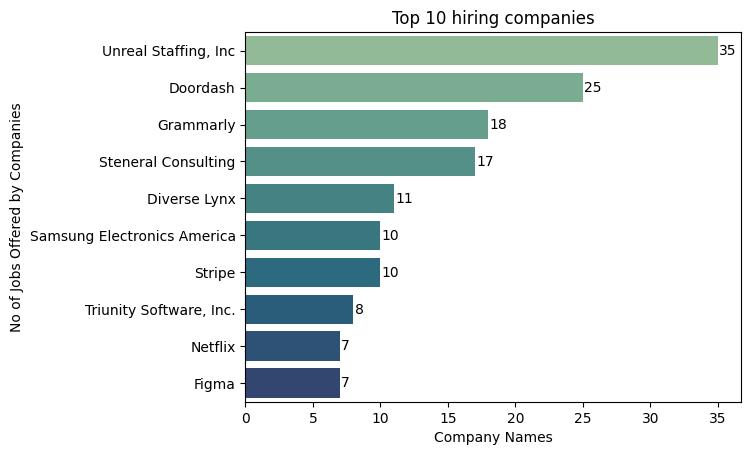

In [83]:
# which 10 companies are hiring the most

top_hiring = updated_jobs['companyName'].value_counts().head(10).reset_index()
top_hiring.columns = ['companyName','noOfJobs']

#plotting the chart
ax = sns.barplot(data=top_hiring,x='noOfJobs',y='companyName',palette='crest')
plt.title('Top 10 hiring companies')
plt.xlabel('Company Names')
plt.ylabel('No of Jobs Offered by Companies')
for container in ax.containers:
    ax.bar_label(container,padding=1)
plt.show()

- Helps job seekers target high-opportunity employers

- Helps recruiters benchmark hiring volume

### 2. Contract Type Trends

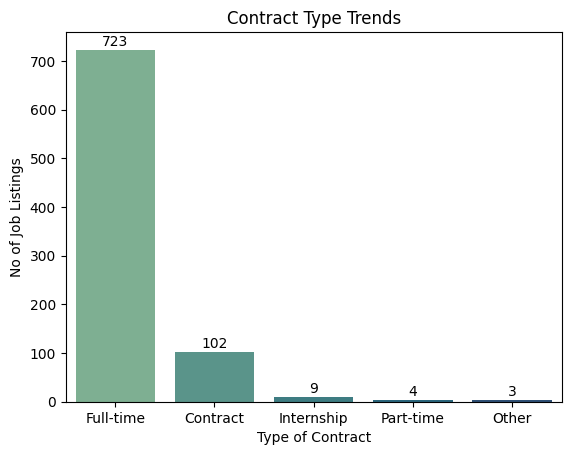

In [84]:
# how are jobs distributed across different contract types (e.g., Full-time, Contract)?

ax = sns.countplot(data=updated_jobs,x='contractType',palette='crest')

plt.title('Contract Type Trends')
plt.xlabel('Type of Contract')
plt.ylabel('No of Job Listings')

for container in ax.containers:
    ax.bar_label(container, padding=1)
plt.show()

- Shows the nature of job availability in the market

- Recruiters can benchmark contract vs full-time usage

### 3. Experience Level Demand

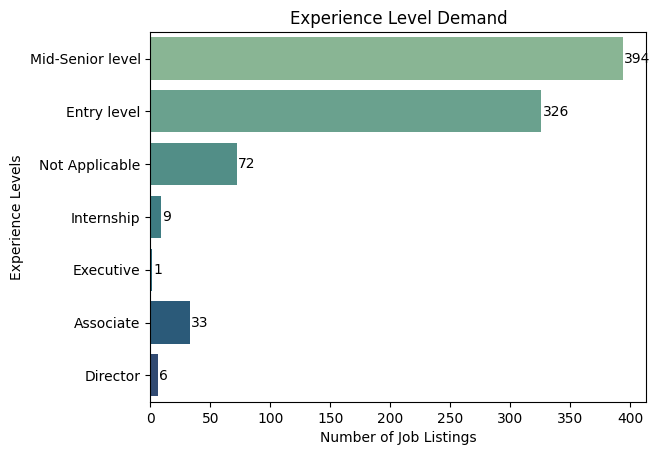

In [85]:
# which experience levels are most in demand?

ax = sns.countplot(data=updated_jobs, y='experienceLevel',palette='crest')
plt.title('Experience Level Demand')
plt.xlabel('Number of Job Listings')
plt.ylabel('Experience Levels')

for container in ax.containers:
    ax.bar_label(container,padding=1)

plt.show()

- Job seekers can position themselves accordingly

- Recruiters can validate if they're aligned with market

### 4. Sector-wise Job Distribution

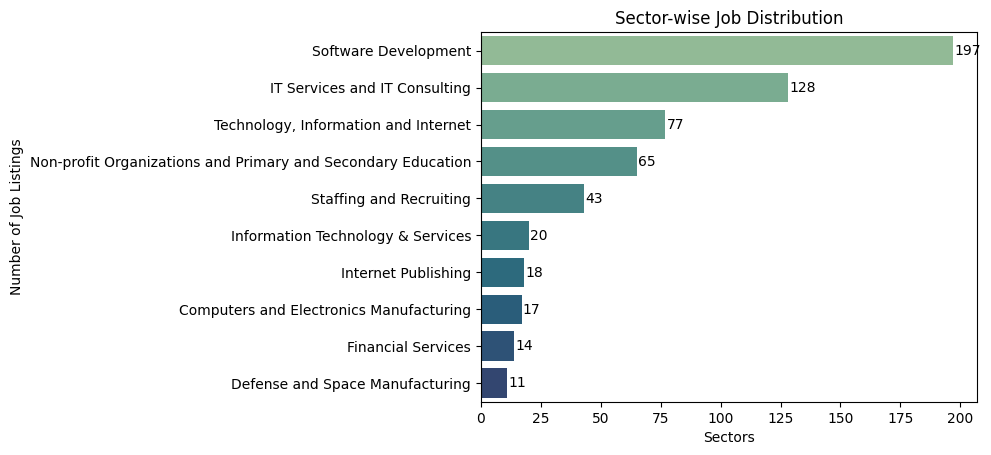

In [86]:
# which 10 sectors have the highest number of listings?

sector_jobs = jobs_df['sector'].value_counts().head(10).reset_index()
sector_jobs.columns = ['sector','jobCount']

ax = sns.barplot(data=sector_jobs, x='jobCount',y='sector',palette='crest')
plt.title('Sector-wise Job Distribution')
plt.xlabel('Sectors')
plt.ylabel('Number of Job Listings')

for container in ax.containers:
    ax.bar_label(container,padding=1)
    
plt.show()

- Job seekers see which industries have the most job openings

- Recruiters get a sense of how active their industry is in hiring

### 5. Job Postings Over Time

/tmp/ipykernel_36/4262238447.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=postings, x='year_month', y='jobPostings', palette='crest', marker='o')
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


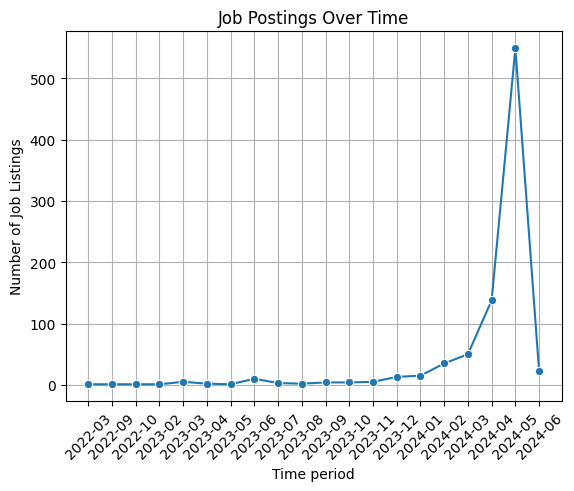

In [87]:
# how has the number of listings changed over months/years?

#extracting the month and year from the date
jobs_df['year_month'] = jobs_df['publishedAt'].dt.to_period('M').astype('str')

# counting the values
postings = jobs_df['year_month'].value_counts().sort_index()
postings = postings.reset_index()
postings.columns = ['year_month','jobPostings']

sns.lineplot(data=postings, x='year_month', y='jobPostings', palette='crest', marker='o')
plt.title('Job Postings Over Time')
plt.xlabel('Time period')
plt.ylabel('Number of Job Listings')
plt.grid(True)
plt.xticks(rotation = 45)
plt.show()

- Job seekers can time their applications better

- Recruiters can plan campaigns around hiring peaks

### 6. Top 10 Hiring Locations (States Only)

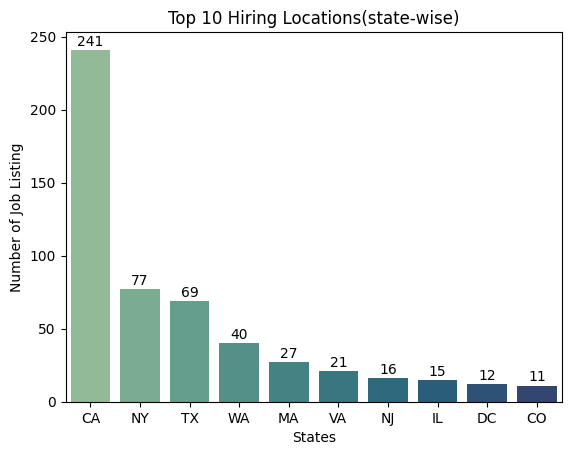

In [104]:
# states column have 'Unknown' and 'United States' as value which needs to be handled first
updated_jobs.state.unique()

# removing the 'unknown' and 'united states' value from the column
state_jobs = updated_jobs[~updated_jobs['state'].isin(['Unknown', 'United States'])].copy()
top_states = state_jobs['state'].value_counts().head(10)
top_states = top_states.reset_index()
top_states.columns = ['state','jobCount']

#plotting the chart
ax = sns.barplot(data=top_states, x='state', y='jobCount', palette='crest')
plt.title('Top 10 Hiring Locations(state-wise)')
plt.ylabel('Number of Job Listing')
plt.xlabel('States')

for container in ax.containers:
    ax.bar_label(container,padding=1)

plt.show()

- Job seekers can focus on high-demand regions

- Recruiters can identify competitive hiring zones

### 7. Application Count Distribution

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


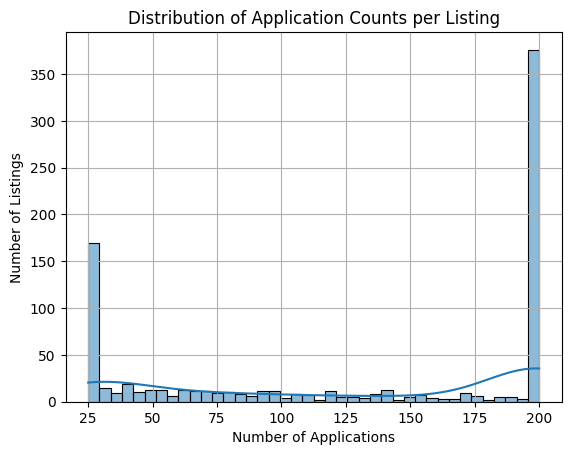

In [111]:
# what is the overall spread of application counts across listings?
sns.histplot(data=updated_jobs, x='applicationsCount', bins=40, kde=True)

plt.title('Distribution of Application Counts per Listing')
plt.xlabel('Number of Applications')
plt.ylabel('Number of Listings')
plt.grid(True)

plt.show()

- Job seekers get a sense of competition

- Recruiters learn which roles get more attention

### 8. Total Applications per Sector

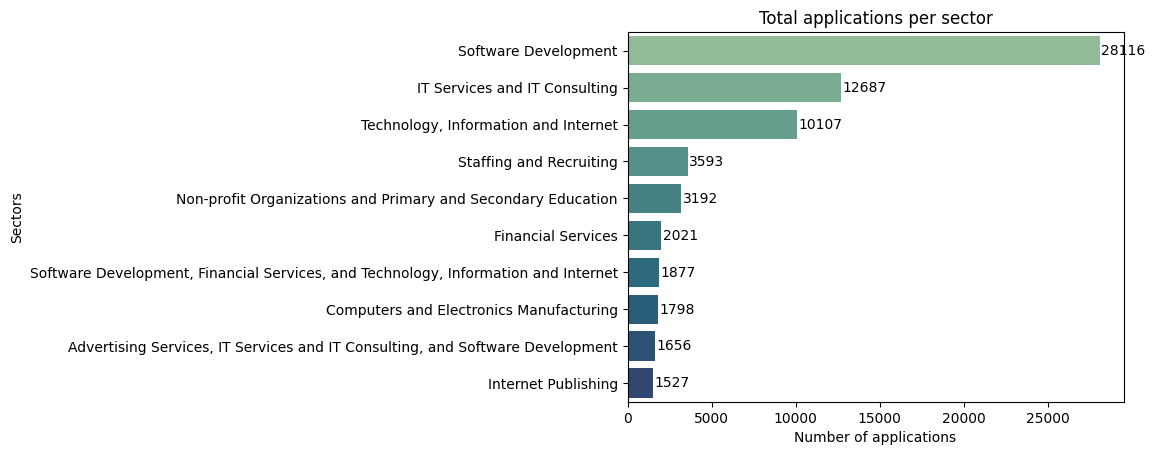

In [129]:
# Which sectors receive more applications in total?

sector_app = jobs_df.groupby('sector',as_index=False).agg({'applicationsCount':'sum'})
sector_app = sector_app.sort_values(by='applicationsCount', ascending=False).head(10).reset_index()

ax = sns.barplot(data=sector_app, y='sector', x='applicationsCount', palette='crest')
plt.title('Total applications per sector')
plt.xlabel('Number of applications')
plt.ylabel('Sectors')

for container in ax.containers:
    ax.bar_label(container,padding=1)

plt.show()

- For job seekers, it reveals which industries may be more competitive to break into.
- For recruiters, it helps benchmark talent interest and assess if their sector is attracting enough visibility.

### 9. Companies Hiring in Each State

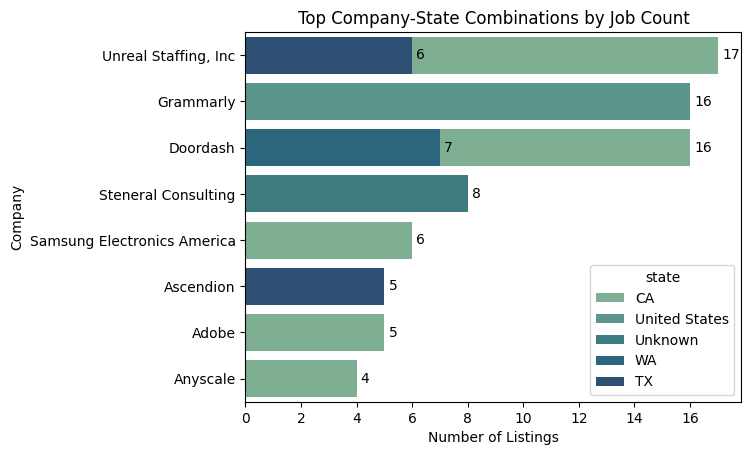

In [148]:
#Which companies are active in which states?

company_state_jobs = updated_jobs.groupby(['companyName', 'state']).size().reset_index(name='jobCount')

company_state_jobs = company_state_jobs.sort_values(by='jobCount', ascending=False)

top_company_state = company_state_jobs.head(10)

ax = sns.barplot(data=top_company_state, x='jobCount', y='companyName', hue='state', dodge=False, palette='crest')

plt.title('Top Company-State Combinations by Job Count')
plt.xlabel('Number of Listings')
plt.ylabel('Company')

for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.show()


- Job seekers understand which companies are hiring in which states — useful for location-specific targeting

- Recruiters analyze regional hiring activity across major competitors



# Visual Exploration Summary – Version 4

In this version, I focused on turning the cleaned dataset into meaningful and useful visualizations using Seaborn and Matplotlib.  
The goal was not to make it look fancy — but to bring out trends that actually matter to either job seekers or recruiters.

## 🔍 What I Did

- Plotted the **top 10 hiring companies** to see who’s hiring the most.
- Looked at the **contract type** and **experience level** distributions to understand what kind of roles are being posted.
- Explored **sector-wise demand** (basic view) to see which industries are putting out the most jobs.
- Checked **job posting activity over time** to spot any hiring patterns or slowdowns.
- Visualized how **applications are spread** across listings — is competition high or balanced?
- Plotted **total applications by sector** to see which industries are getting the most attention overall.
- Added a **company + state combination chart** to see where hiring is happening geographically — who’s hiring and in which states.

## ⚠️ What I Didn’t Cover

- I skipped the `title` column in this version since the data is too messy and inconsistent. I’ll clean and explore it properly in **v5**.
- I also skipped deeper analysis of the `sector` column (like cross-analysis with experience or applications) for now — that’ll also be part of the next version after cleanup.

## 🎯 What I Learned

- Even without touching the messy parts, you can still pull out 8–9 strong insights just by using visual tools smartly.
- Adding visual context makes patterns easier to understand — especially when looking at competition levels, top companies, and hiring locations.
- It's better to skip noisy columns than force weak charts — the real value comes from **clean, readable trends**.
